# Data Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this data-set to predict the final price of each home.

In [1]:
import pandas as pd #to load and manipulate data
import numpy as np
import matplotlib.pyplot as plt #to draw graphs 
import seaborn as sns #to draw graphs 
from scipy import stats
from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.metrics import confusion_matrix #to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix  #to draw a confusion matrix
import shap

# First Exploration

In [2]:
test_set = pd.read_csv(r'C:\Users\lpennella\Desktop/Master/Analytics in Economics/DB/test.csv')
train_set = pd.read_csv(r'C:\Users\lpennella\Desktop/Master/Analytics in Economics/DB/train.csv')

In [3]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('N. of rows: {}'.format(train_set.shape[0]))
print('N. of columns: {}'.format(train_set.shape[1]))

N. of rows: 1460
N. of columns: 81


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

With the command *info()* I'm able to observe any NaN values.

# Missing Data and first Data Cleaning

In [6]:
train_set['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [7]:
train_set['PoolQC'].isna().sum()

1453

In [8]:
train_set[train_set.columns[train_set.isna().any()]]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


We have seen several NaN values in 19th columns.

In [9]:
cl_fill = train_set.notna().sum()/len(train_set)*100

In [10]:
cl_empty = cl_fill[cl_fill[:] <85]

In [11]:
cl_fill[cl_fill[:] <85]

LotFrontage    82.260274
Alley           6.232877
FireplaceQu    52.739726
PoolQC          0.479452
Fence          19.246575
MiscFeature     3.698630
dtype: float64

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete.

In [12]:
cl_empty = cl_empty.index.tolist()

In [13]:
df = train_set.drop(cl_empty, axis = 1).copy()

In [14]:
df[df.columns[df.isna().any()]]

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


I analyze the remaining columns with NaN values to understand if they contain information already present in other columns.

In [15]:
df.isnull().sum().sort_values(ascending=False).head(14)

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
PavedDrive       0
dtype: int64

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

For the garage variables we can observe the same number of NaN (81), they are probably all concentrated in the same observations. Also, they cover 5% of the population and I have variables like *GarageCars*, *GarageArea*, *GarageArea* and *GarageCond* which I think are quite representative for a garage. Based on what has been said, I proceed to delete the Garage columns with NaN values.

The same logic applies to Basement features.

I delete the observation where *Eletric* features is NaN.

In [16]:
df = df.drop(['GarageType',
              'GarageCond',
              'GarageYrBlt',
              'GarageFinish',
              'GarageQual',
              'BsmtFinType2',
              'BsmtExposure',
              'BsmtFinType1',
              'BsmtCond',
              'BsmtQual'], axis = 1).copy()

In [17]:
df = df.drop(df.loc[df['Electrical'].isnull()].index)

In [18]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
df.isnull().sum().sort_values(ascending=False).head(14)

MasVnrArea      8
MasVnrType      8
Id              0
Functional      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

I look for any variables strongly correlated with *MasVnrArea* and *MasVnrType*, in this case I proceed to the elimination of these variables.

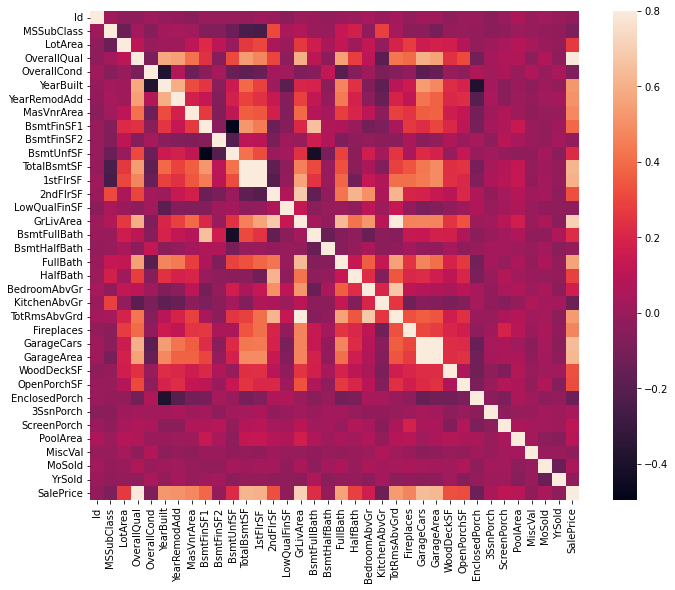

In [20]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=.8, square=True);

*MasVnrArea* does not seem to be strongly correlated with the sales price (target) so I proceed to remove the variables *MasVnrArea* and *MasVnrType*

Observing the correlation matrix we can see how the *GarageCars* and *GarageArea* variables are strongly correlated. This relationship makes sense as the number of cars that can enter a garage depends on its area. To avoid correlation problems I delete *GarageArea*.

*TotalBsmtSF* and *1stFlrSF* also seem to have correlation problems, both variables indicate the foreground area. I proceed with the elimination of *TotalBsmtSF*.

*GrLivArea* and *TotRmsAbvGrd* also report the same information, the rooms placed above grade. I delete *TotRmsAbvGrd*.

In [21]:
df = df.drop(['MasVnrArea',
              'MasVnrType',
              'GarageArea',
              'TotalBsmtSF',
              'TotRmsAbvGrd'], axis = 1).copy()

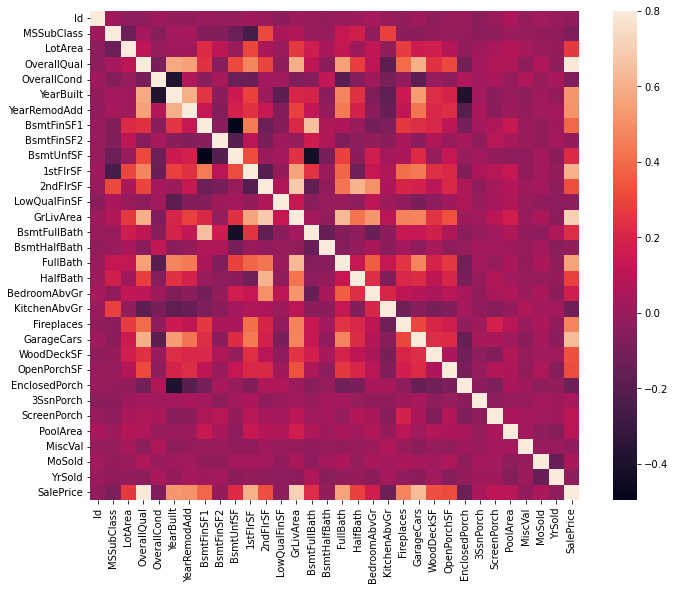

In [22]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=.8, square=True);

We can observe how SalePrice (target) has a positive relationship with *OverallQual*, *GrLivArea*, *1stFlrSF* and *GarageArea*. In my opinion, these relationships make sense as the value of a house depends a lot on the quality of the materials and the square footage of its rooms.

# Analysing Y (*SalePrice*)

In [23]:
df['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [24]:
cat_cols = df.select_dtypes('object')

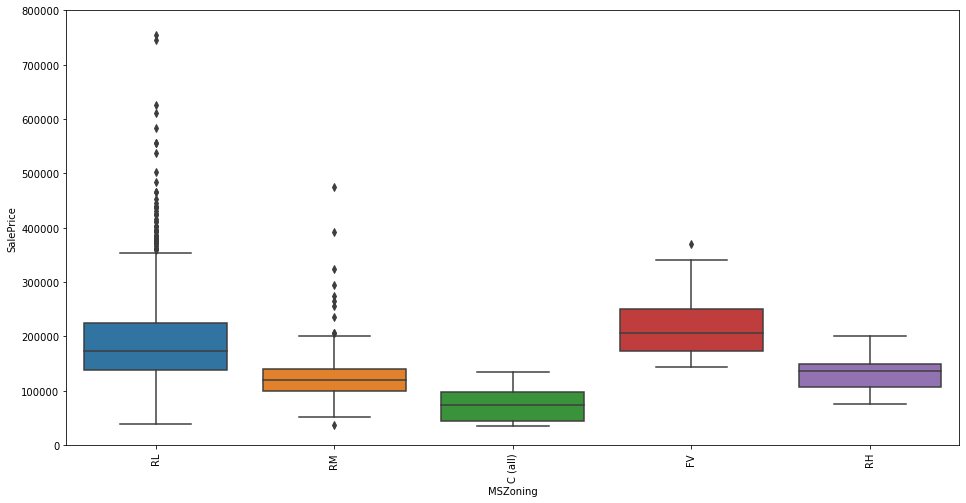

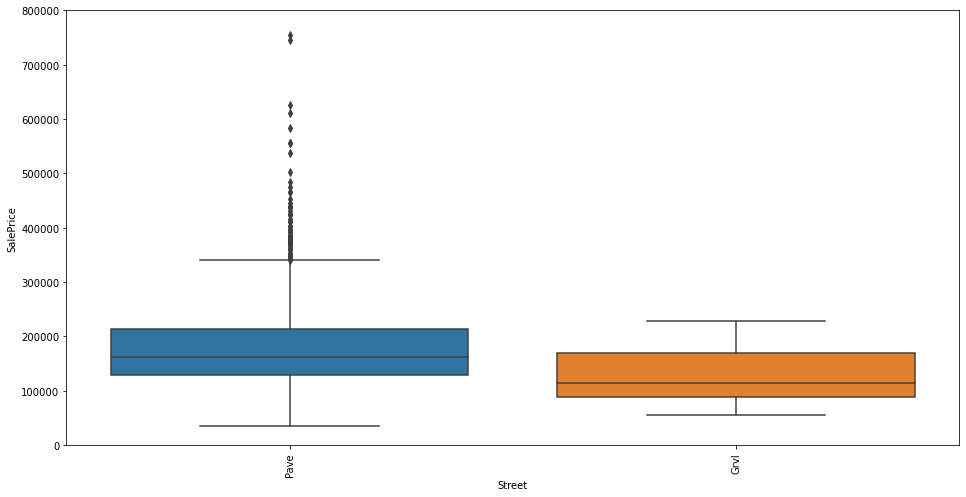

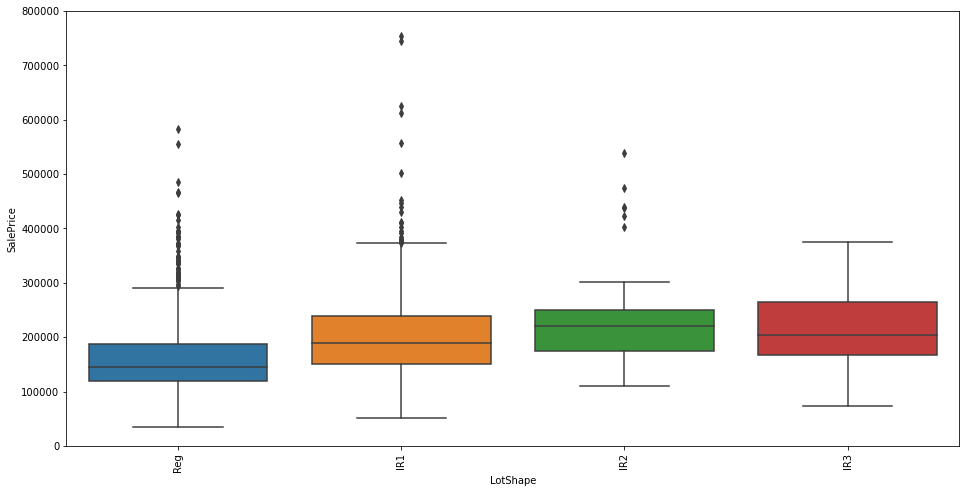

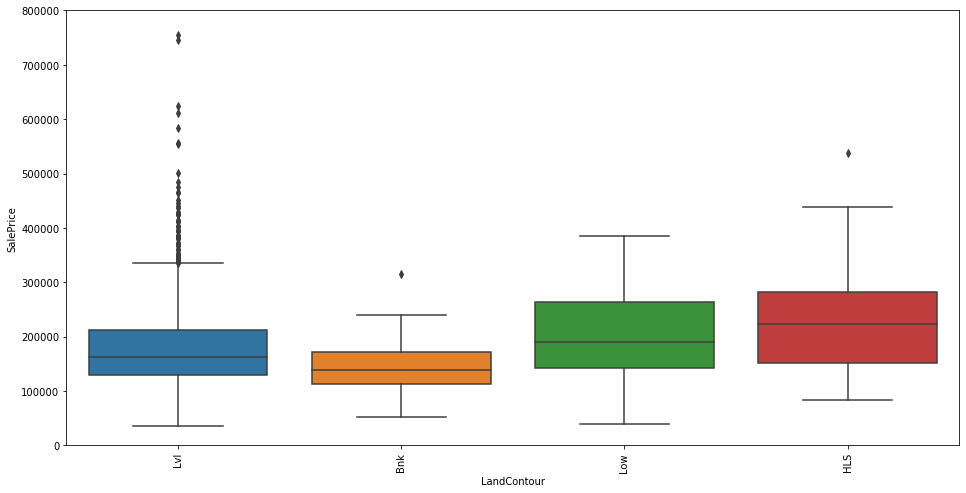

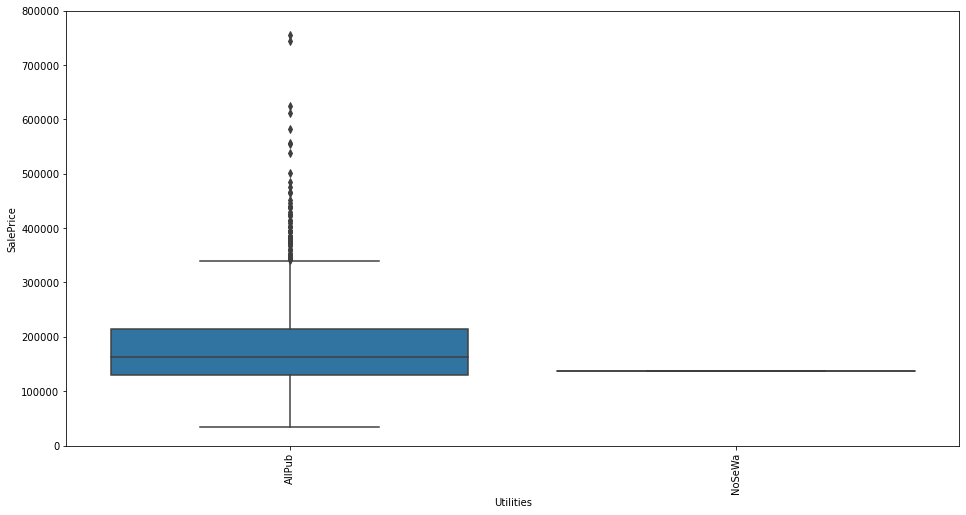

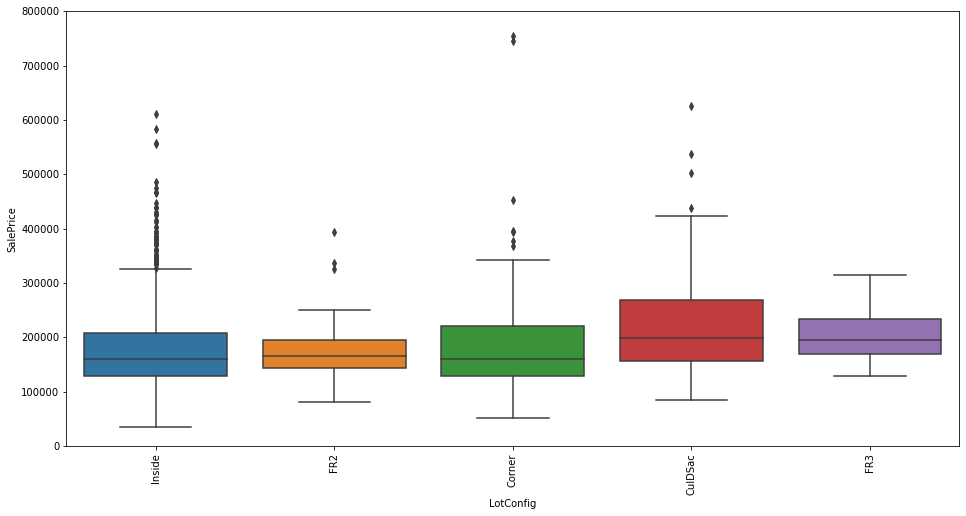

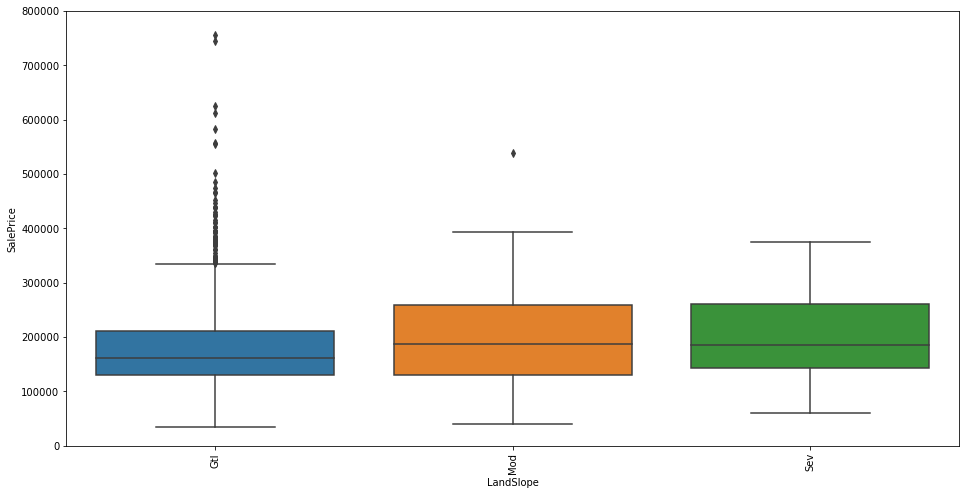

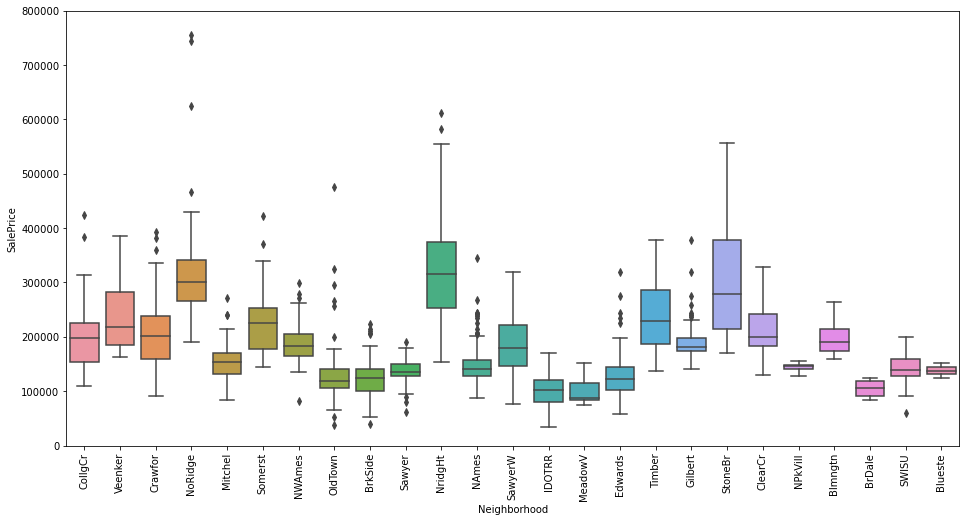

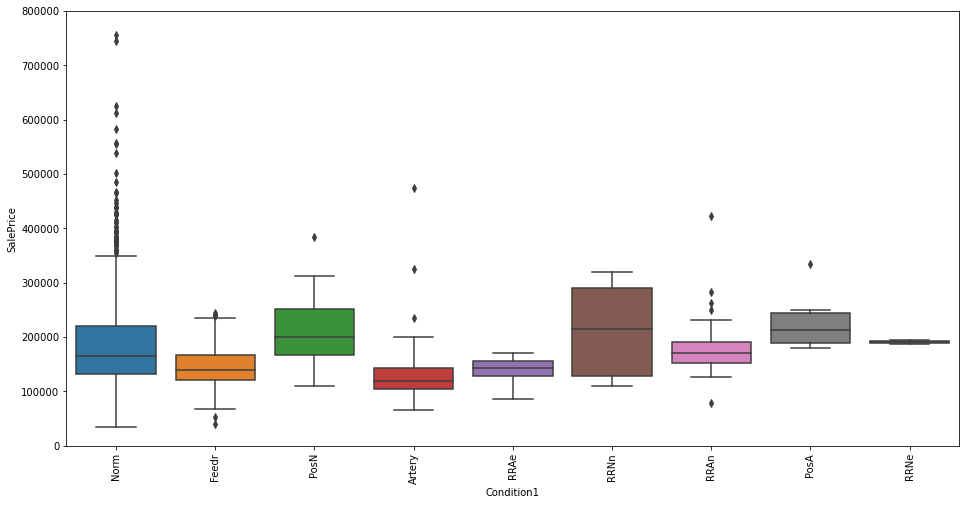

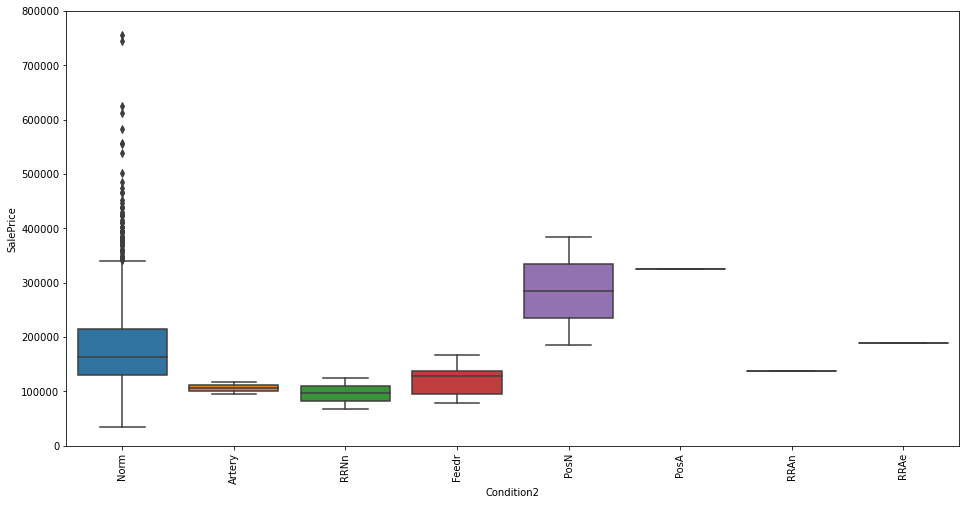

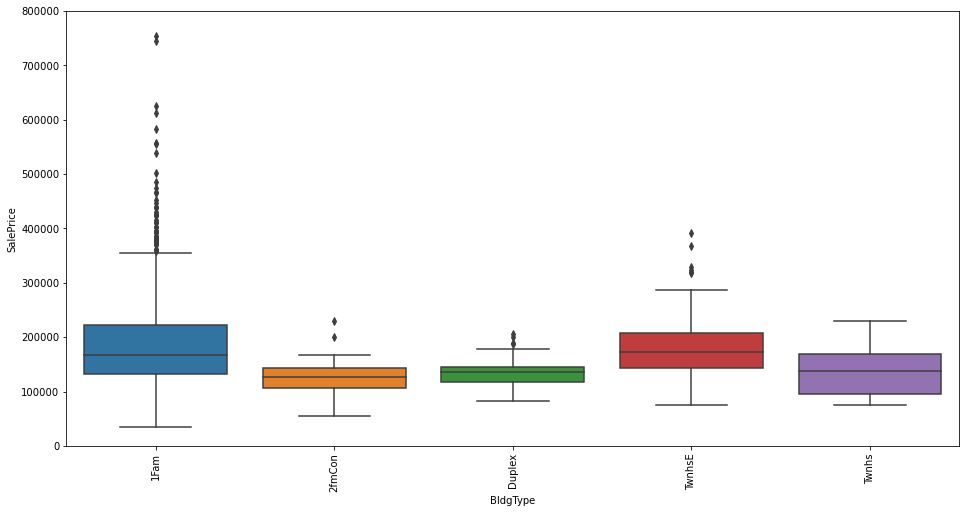

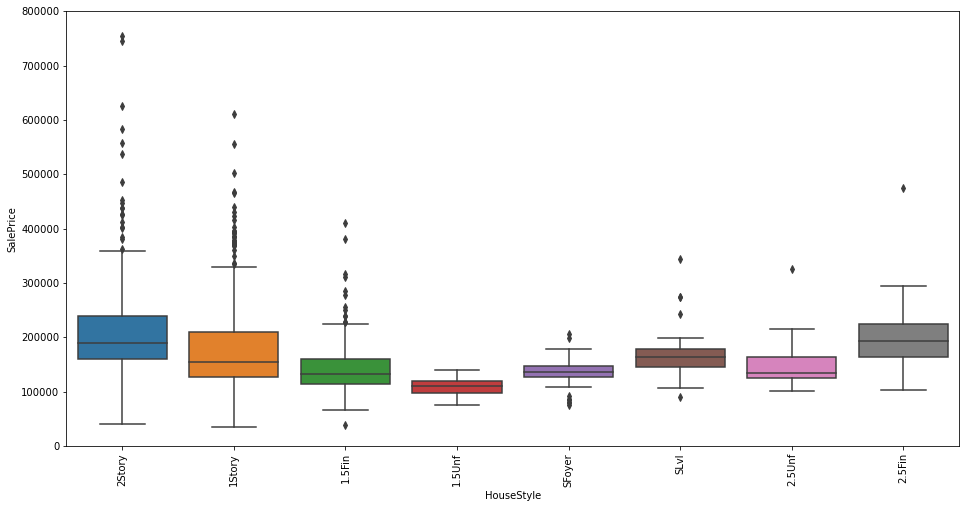

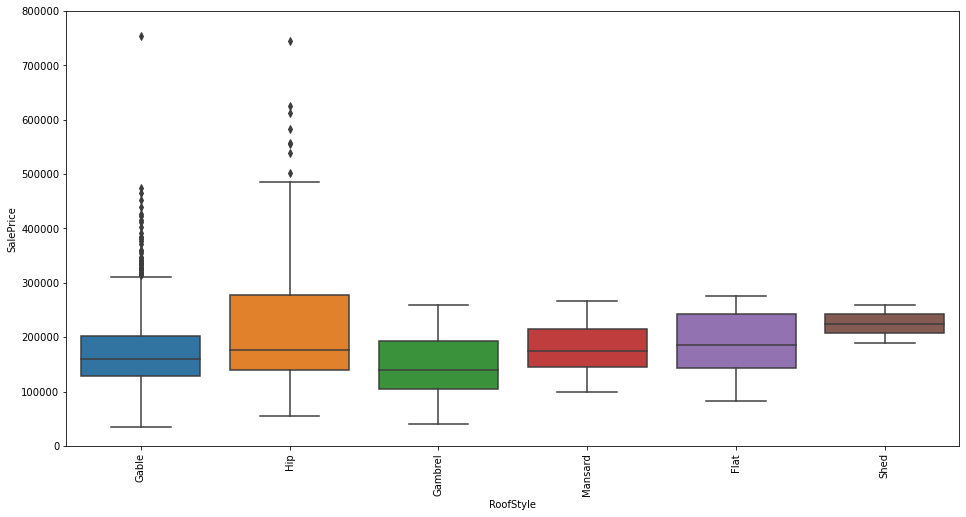

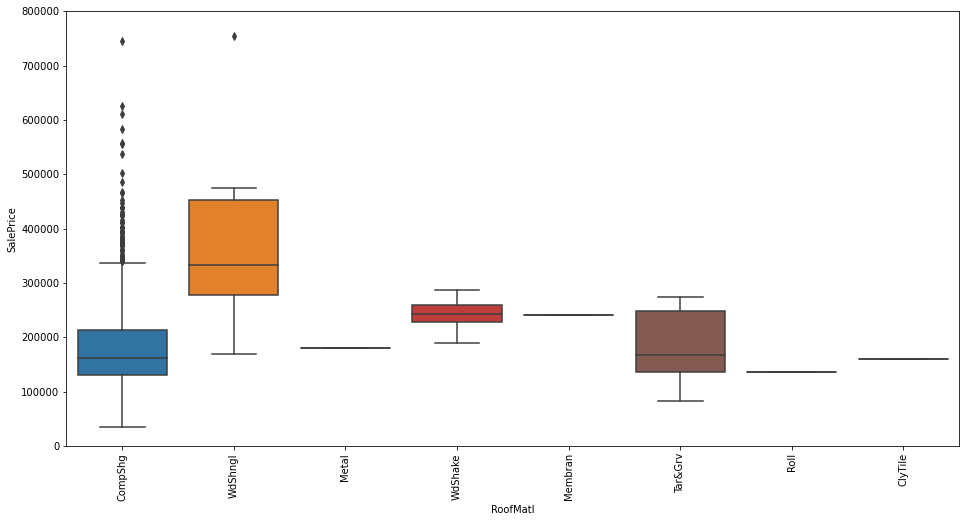

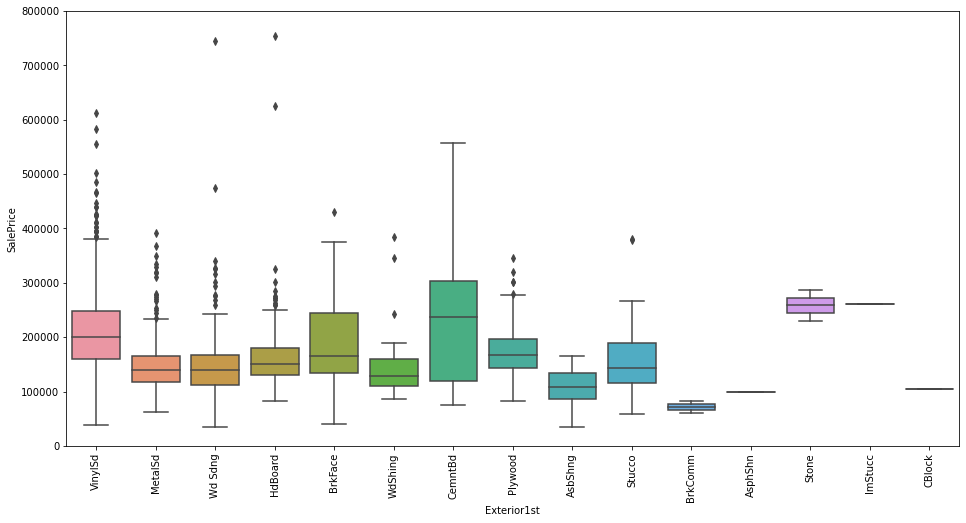

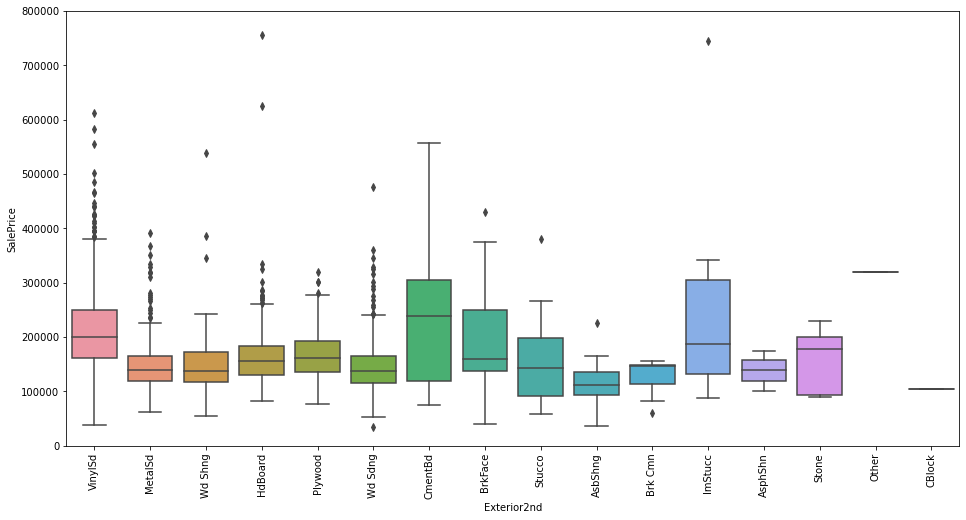

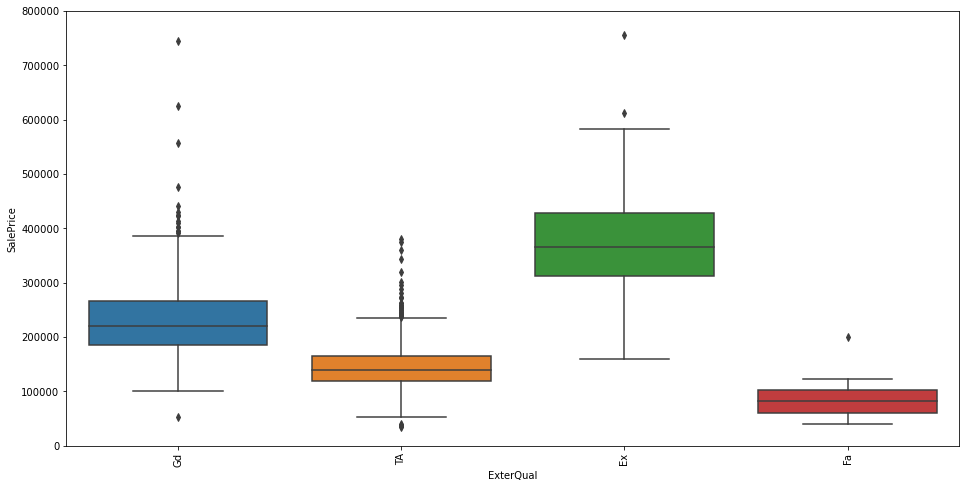

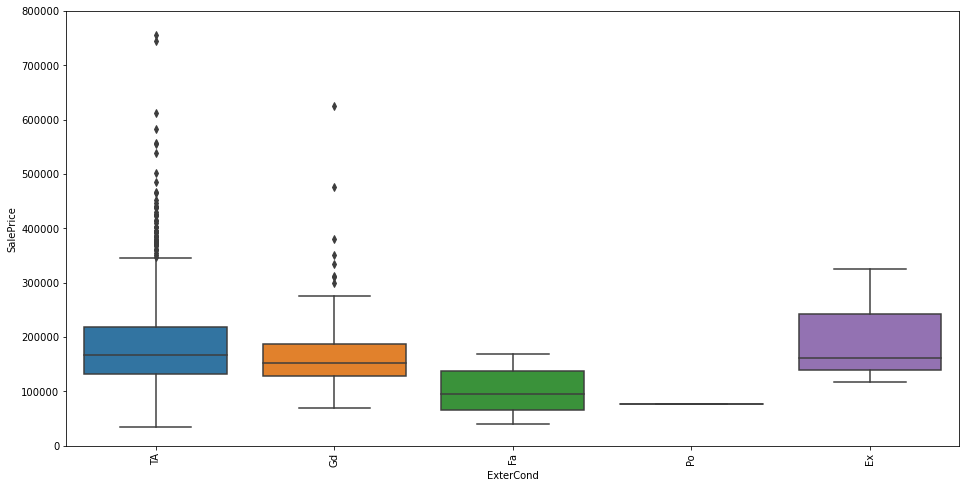

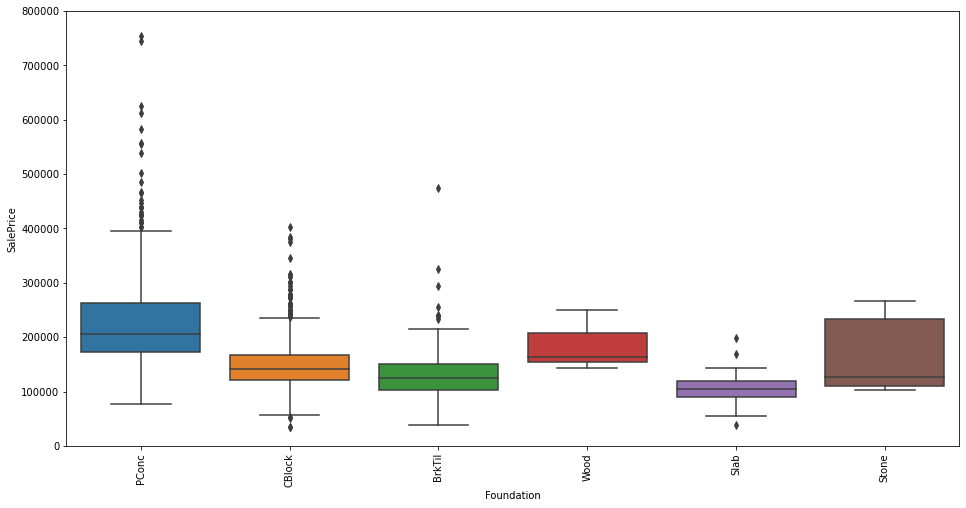

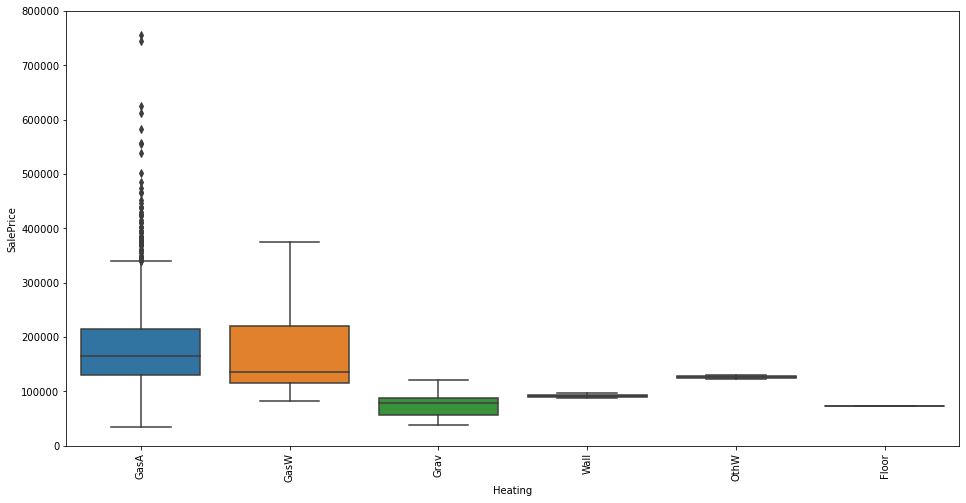

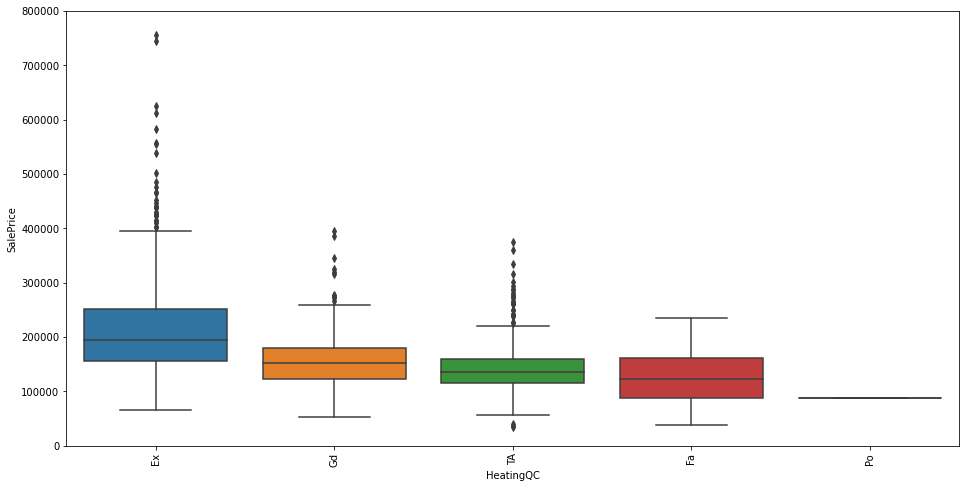

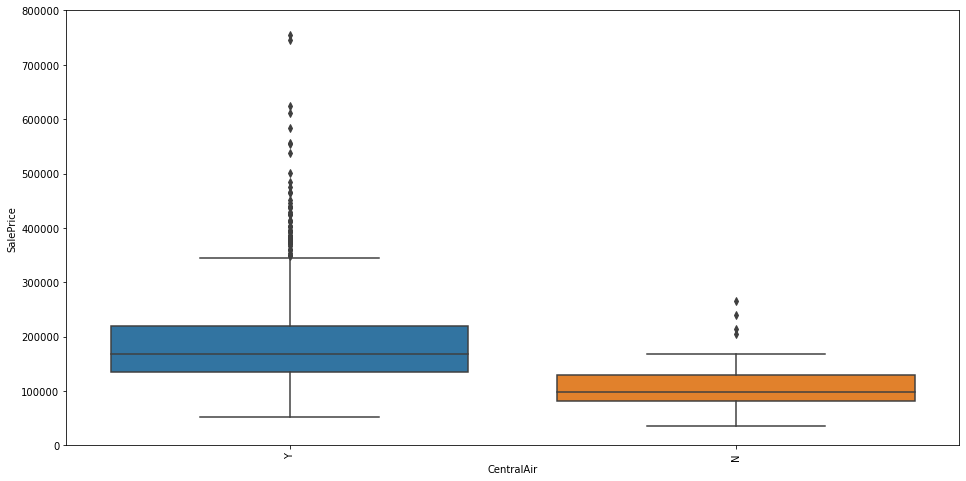

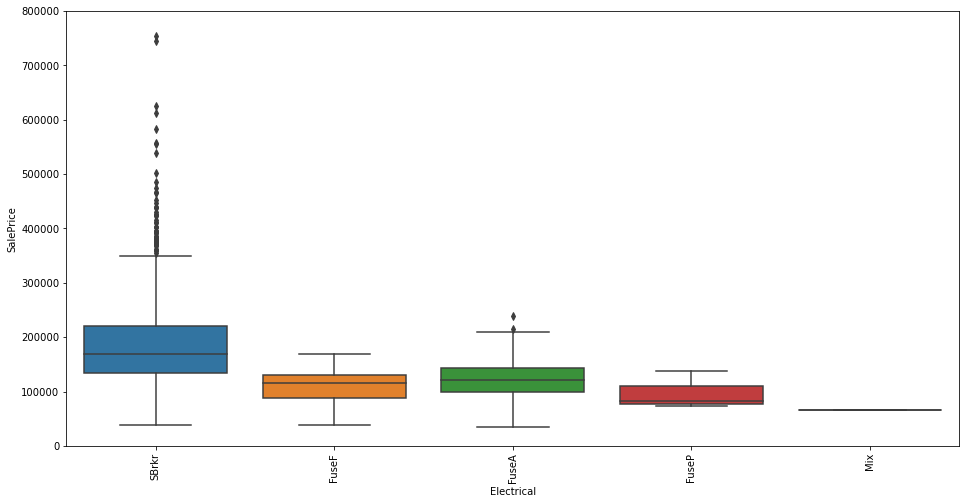

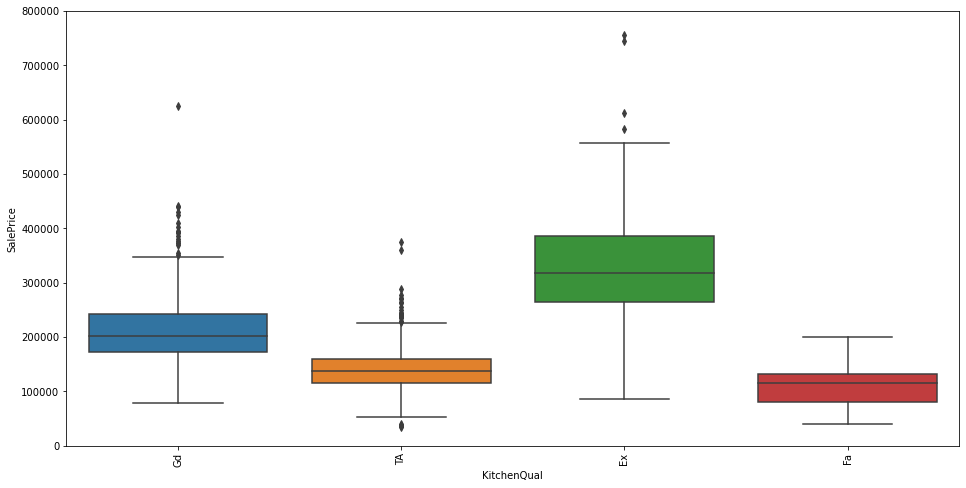

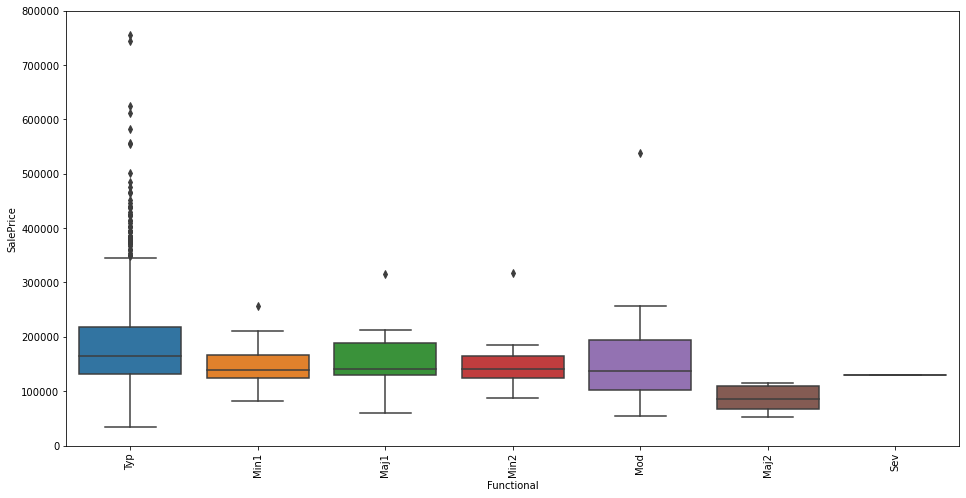

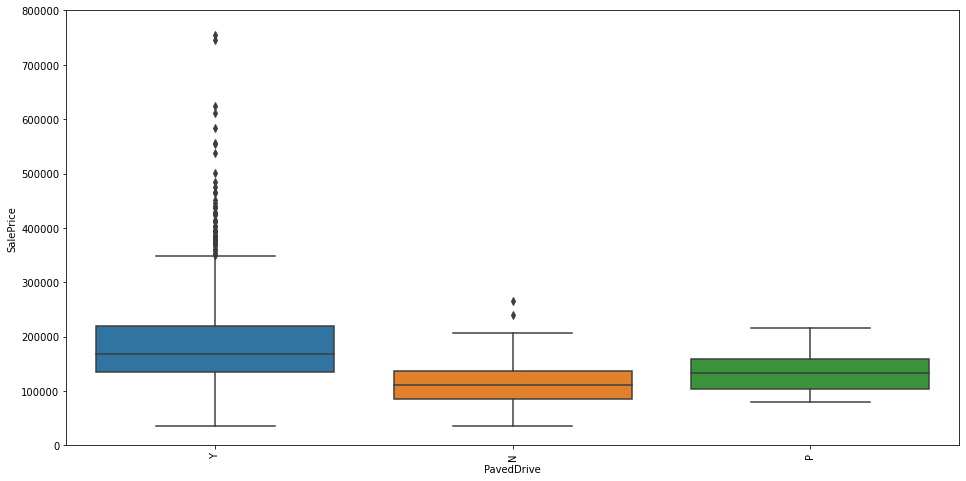

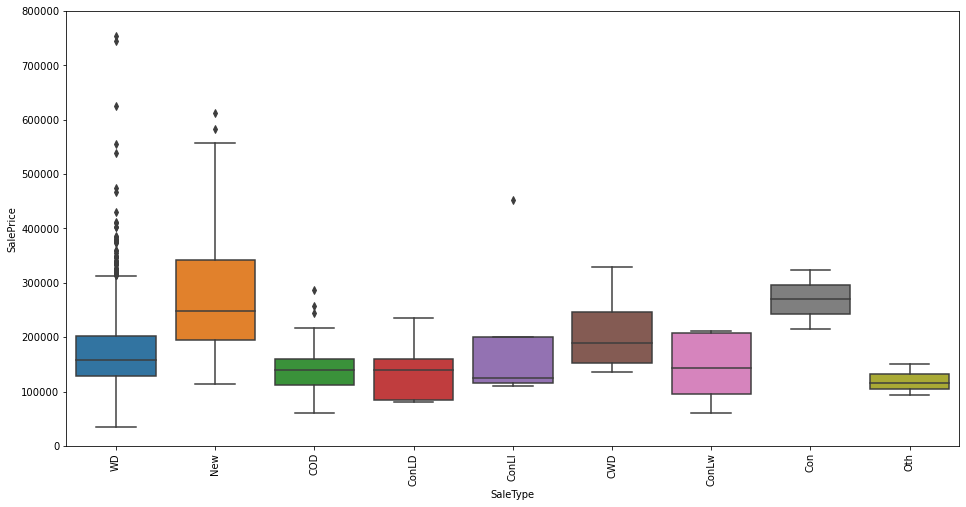

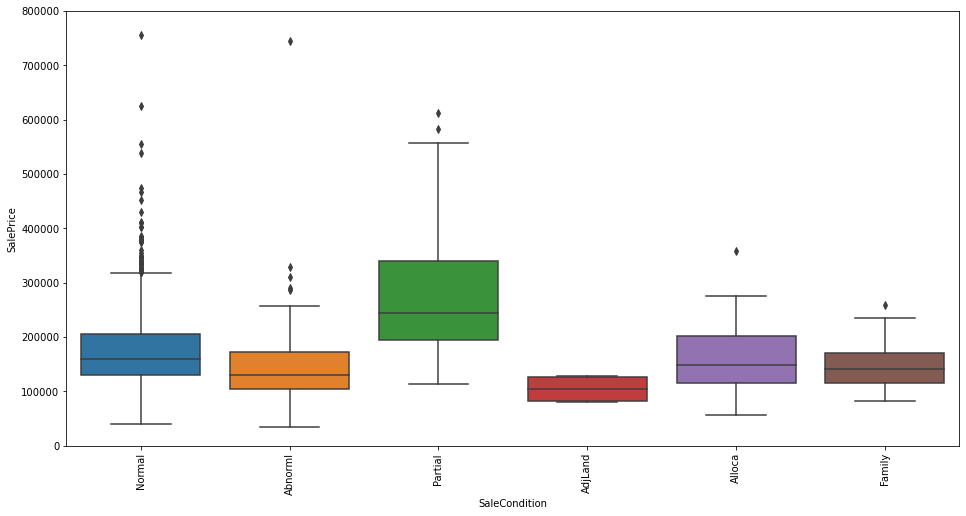

In [25]:
for i in cat_cols:    
        var = i
        data = pd.concat([df['SalePrice'], df[i]], axis=1)
        f, ax = plt.subplots(figsize=(16, 8))
        fig = sns.boxplot(x=i, y='SalePrice', data=data)
        fig.axis(ymin=0, ymax=800000);
        plt.xticks(rotation=90);
        plt.show()

**MSZoning** (Identifies the general zoning classification of the sale)
* The area of the property looks like a relationship with the price. 
* Floating Village Residential and Residential Low Density seem to be the areas of greatest value.

**Street** (Type of road access to property)
* The type of road access impact on house price, the Gravel road usually use in low-prices house.

**LotShape** (General shape of property)
* The General shape of property seems has impact on price. For Regular Shape we see a few outliers.

**LandContour**
* Flatness of the property appears to have an impact on the price.

**Utilities**
* Looking at the graph relating to Type of utilities, it is possible to see that most of the properties have All public Utilities.
* Given the low information content of this variable, I eliminate it.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

In [27]:
df = df.drop(['Utilities'], axis = 1).copy()

**LotConfig**
* The classes within LotConfig don't seem to have clear evidence

To reduce the analysis times I will use other techniques to select the most significant categorical variables.

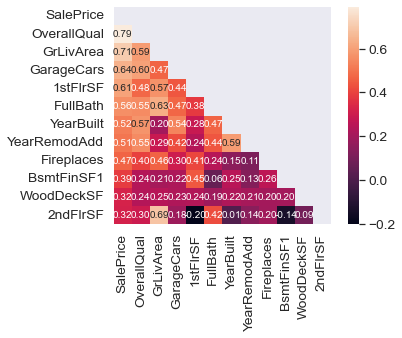

In [28]:
k = 12
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
matrix = np.triu(df.corr().nlargest(k, 'SalePrice')['SalePrice'].index)
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, mask =matrix)
plt.show()

* *OverallQual*, *GrLivArea*, *GarageCars*, *1stFlrSF* are the most correlated Features with the *y*, they are all over 0.60.

In [29]:
df['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

* The number of bathrooms above grade has a positive relationship with *SalePrice*.
* *YearBuilt* and *YearRemodAdd* are correlated with *SalePrice*, in fact, if the house is recent or recently remodel the price is highest.
* The number of Fireplaces has a positive relationship with *y*.
* *BsmtFinSF1*, *WoodDeckSF* and *2ndFlrSF* have a correlation postive range between 0.32 and 0.40.

In [30]:
corr_matrix = df.corr()
corr_matrix["SalePrice"].sort_values(ascending=True)

KitchenAbvGr    -0.135935
EnclosedPorch   -0.128627
MSSubClass      -0.084230
OverallCond     -0.077924
YrSold          -0.028907
LowQualFinSF    -0.025620
Id              -0.021756
MiscVal         -0.021200
BsmtHalfBath    -0.016873
BsmtFinSF2      -0.011412
3SsnPorch        0.044571
MoSold           0.046380
PoolArea         0.092397
ScreenPorch      0.111419
BedroomAbvGr     0.168235
BsmtUnfSF        0.214446
BsmtFullBath     0.227082
LotArea          0.263837
HalfBath         0.284400
OpenPorchSF      0.315831
2ndFlrSF         0.319464
WoodDeckSF       0.324422
BsmtFinSF1       0.386436
Fireplaces       0.466968
YearRemodAdd     0.507430
YearBuilt        0.523273
FullBath         0.560881
1stFlrSF         0.605968
GarageCars       0.640473
GrLivArea        0.708618
OverallQual      0.791069
SalePrice        1.000000
Name: SalePrice, dtype: float64

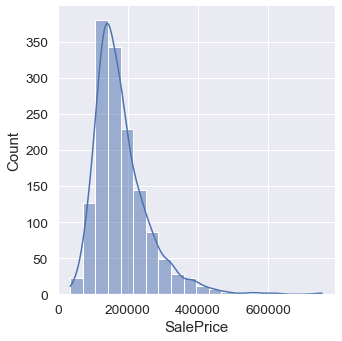

In [31]:
sns.displot(df['SalePrice'], bins = 20, kde = True);

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74187.860388132, 180930.39479095273, 0.9320032714937404))

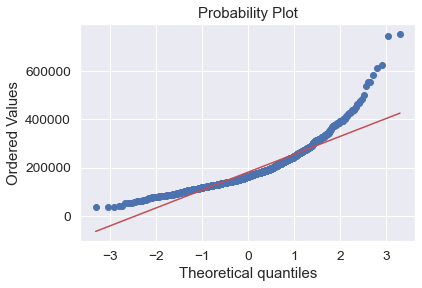

In [32]:
stats.probplot(df['SalePrice'], plot=plt)

The distribution of *SalePrice* Deviate from the normal distribution and has a positive skewness.

In these cases it may make sense to implement transformations to make the distribution more normal, for example, the log transformation.

In [33]:
df['LogSalePrice'] = np.log(df['SalePrice'])

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3984035944009483, 12.024047688135333, 0.9953872421515823))

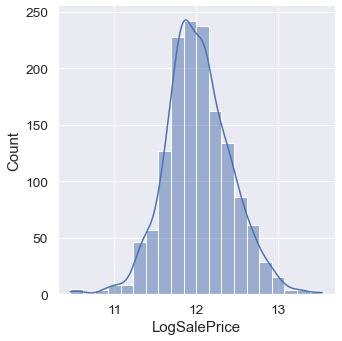

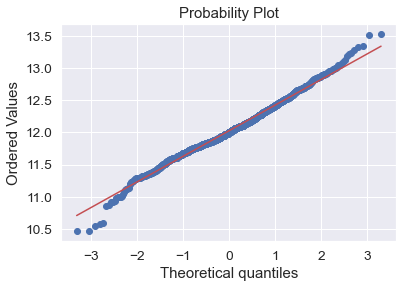

In [34]:
sns.displot(df['LogSalePrice'], bins = 20, kde = True);
fig = plt.figure()
stats.probplot(df['LogSalePrice'], plot=plt)

We can see how the logarithmic transformation makes the y more like a Gaussian

# Try new Variables

In [35]:
df_try = df.copy()
df_try["Age"] = np.where(df_try.YearRemodAdd > 0, df_try["YearRemodAdd"] - 2020 ,  df_try["YearBuilt"] - 2020
)
df_try[["SalePrice","YearRemodAdd", "YearBuilt", "Age" ]]

,SalePrice,YearRemodAdd,YearBuilt,Age
0,208500,2003,2003,-17
1,181500,1976,1976,-44
2,223500,2002,2001,-18
3,140000,1970,1915,-50
4,250000,2000,2000,-20
...,...,...,...,...
1455,175000,2000,1999,-20
1456,210000,1988,1978,-32
1457,266500,2006,1941,-14
1458,142125,1996,1950,-24


In [36]:
corr_matrix = df_try.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
LogSalePrice     0.948384
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
1stFlrSF         0.605968
FullBath         0.560881
YearBuilt        0.523273
YearRemodAdd     0.507430
Age              0.507430
Fireplaces       0.466968
BsmtFinSF1       0.386436
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
Id              -0.021756
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64

Age is too similar *YearRemodAdd* at level of correlation, for this reason I don't use new feature.

# Features engineering

I study better the distribution of the most correlated variables with SalePrice.

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([ 334,  438,  480, ..., 4476, 4676, 5642], dtype=int64)),
 (506.8582122788622, 1515.5469499657302, 0.9626561624641505))

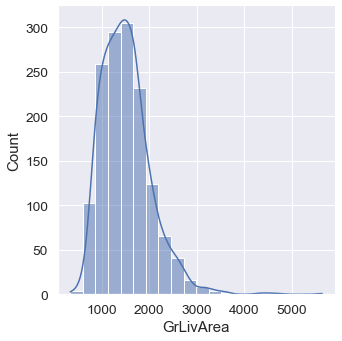

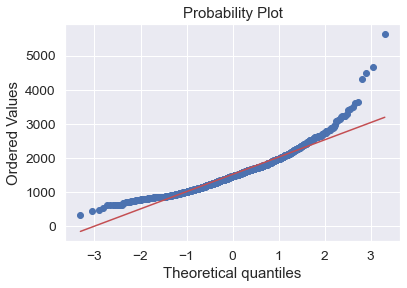

In [37]:
sns.displot(df['GrLivArea'], bins = 20, kde = True);
fig = plt.figure()
stats.probplot(df['GrLivArea'], plot=plt)

In [38]:
df['GrLivArea'] = np.log(df['GrLivArea'])

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.40648507, 8.45019832,
         8.63799389])),
 (0.3334564626043728, 7.26779346610195, 0.9977274878020765))

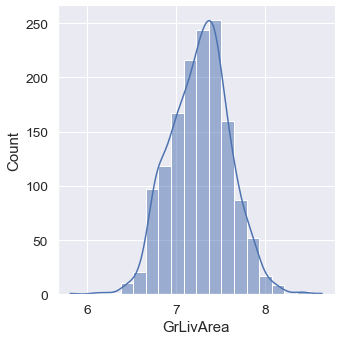

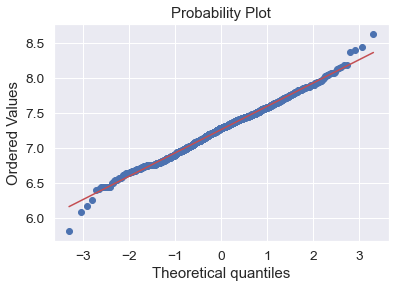

In [39]:
sns.displot(df['GrLivArea'], bins = 20, kde = True);
fig = plt.figure()
stats.probplot(df['GrLivArea'], plot=plt)

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([ 334,  372,  438, ..., 3138, 3228, 4692], dtype=int64)),
 (372.4832248678631, 1162.9067854694997, 0.9619629959627479))

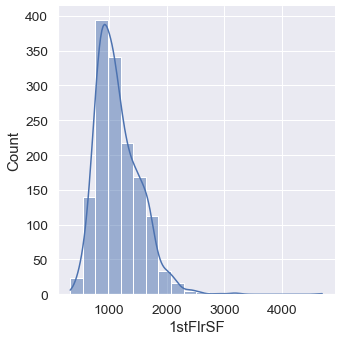

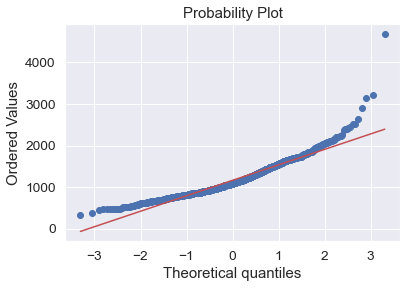

In [40]:
sns.displot(df['1stFlrSF'], bins = 20, kde = True);
fig = plt.figure()
stats.probplot(df['1stFlrSF'], plot=plt)

In [41]:
df['1stFlrSF'] = np.log(df['1stFlrSF'])

((array([-3.30494753, -3.04772643, -2.90468264, ...,  2.90468264,
          3.04772643,  3.30494753]),
  array([5.81114099, 5.91889385, 6.08221891, ..., 8.05134093, 8.07961803,
         8.45361421])),
 (0.3174427550066113, 7.007763342873405, 0.9975985503650026))

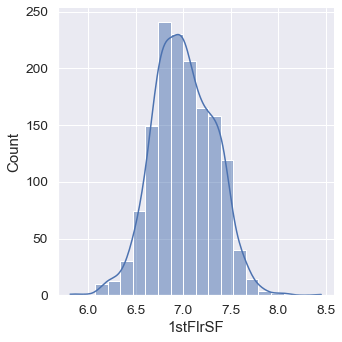

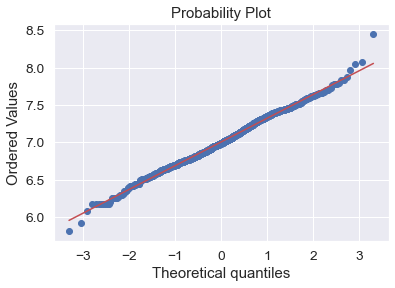

In [42]:
sns.displot(df['1stFlrSF'], bins = 20, kde = True);
fig = plt.figure()
stats.probplot(df['1stFlrSF'], plot=plt)

In [43]:
df = df.drop(['SalePrice'], axis = 1).copy()

# Split in train and test set and Encoding Categorical Features

In [44]:
test_set = test_set.drop(['Utilities',
                          'MasVnrArea',
                          'MasVnrType',
                          'GarageArea',
                          'TotalBsmtSF',
                          'TotRmsAbvGrd',
                          'GarageType',
                          'GarageCond',
                          'GarageYrBlt',
                          'GarageFinish',
                          'GarageQual',
                          'BsmtFinType2',
                          'BsmtExposure',
                          'BsmtFinType1',
                          'BsmtCond',
                          'BsmtQual',
                          'LotFrontage',
                          'Alley',
                          'PoolQC', 
                          'Fence', 
                          'MiscFeature',
                          'FireplaceQu'
                         ], axis = 1).copy()
test_set['GrLivArea'] = np.log(test_set['GrLivArea'])
test_set['1stFlrSF'] = np.log(test_set['1stFlrSF'])
#test_set = test_set.dropna()
test_set.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [46]:
ntrain = df.shape[0]
ntest = test_set.shape[0]
y = df.LogSalePrice.values
all_data = pd.concat((df, test_set)).reset_index(drop=True)
all_data.drop(['LogSalePrice', 'Id'], axis=1, inplace=True)

In [47]:
all_data.shape

(2918, 57)

In [48]:
cat_cols = df.select_dtypes('object')
all_data_enc = pd.get_dummies(all_data)

In [49]:
all_data_enc.shape

(2918, 215)

In [50]:
df_dummy = pd.get_dummies(all_data)
col = df_dummy.columns.tolist()
col_n = df_dummy.columns.tolist()

In [51]:
col_n

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_C

In [52]:
col = pd.DataFrame(col)
col = col.T

In [53]:
from sklearn.impute import KNNImputer
imputer =  KNNImputer(n_neighbors=2, weights="uniform")
all_data_enc = imputer.fit_transform(all_data_enc)
all_data_enc = pd.DataFrame(all_data_enc)

In [54]:
X_train = all_data_enc[:ntrain]
X_test = all_data_enc[ntrain:]

In [55]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
1459,20.0,11622.0,5.0,6.0,1961.0,1961.0,468.0,144.0,270.0,6.797940,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1460,20.0,14267.0,6.0,6.0,1958.0,1958.0,923.0,0.0,406.0,7.192182,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1461,60.0,13830.0,5.0,5.0,1997.0,1998.0,791.0,0.0,137.0,6.833032,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1462,60.0,9978.0,6.0,6.0,1998.0,1998.0,602.0,0.0,324.0,6.830874,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1463,120.0,5005.0,8.0,5.0,1992.0,1992.0,263.0,0.0,1017.0,7.154615,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
X_test[X_test.columns[X_test.isna().any()]]

""
1459
1460
1461
1462
1463
...
2913
2914
2915
2916


In [57]:
X_train.shape

(1459, 215)

In [58]:
X_test.shape

(1459, 215)

In [59]:
X_test.isnull().sum().sort_values(ascending=False).head(14)

0      0
135    0
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
dtype: int64

# First Evaluation of different Models

We will try two different model, the first one is a Ridge Regression with all features. In the second part we use a Lasso regression, the cost funtion has a regularization parameter -L1 penalty- with an alpha that tunes the intensity of this penalty term. This penalty reduces some features to zero, which makes it easier to understand and interpret the prediction.
Once I obtained the best features, I comparison it with the previous hyopotesis obtained by correlation matrix and try new models.

**Ridge Regression**


Ridge Regression is a regularized version of Linear Regression: a regularization term equal is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.


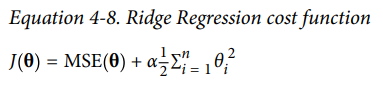

— *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2019.

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression.

**Lasso Regression**

Lasso Regression is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.


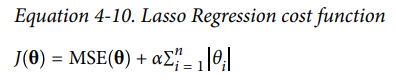

— *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2019.

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero), with these characteristics Lasso Regression automatically performs feature selection.

In [60]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [61]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

**Ridge regression with built-in cross-validation**

In [62]:
alphas = [0.01, 0.05, 0.1, 0.3, 1, 5, 6, 7, 8, 10, 15]

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv = 15)
ridgecv.fit(X_train, y)

ridgecv.alpha_


5.0

In [63]:
ridgecv.best_score_

-0.0176607260731932

In [64]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y)

print('Ridge Regression:')
print("Alpha =", ridgecv.alpha_)
print("RMSE =", rmse(y, ridge.predict(X_train)))

Ridge Regression:
Alpha = 5.0
RMSE = 0.10704632353503976


The best α is 5 for Ridge Regression, in this case we perform 15 cross-validation for find the better α. 

The Root-Mean-Square Error is 0.107046.

**Lasso linear model with iterative fitting along a regularization path.**

In [65]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 1, 5, 6, 7, 8, 10, 15]

lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 10000)
lassocv.fit(X_train, y)

lassocv.alpha_

0.001

In [66]:
print('Lasso Regression:')
print("Alpha =", lassocv.alpha_)
print("RMSE =", rmse(y, lassocv.predict(X_train)))

Lasso Regression:
Alpha = 0.001
RMSE = 0.11884268207918725


The best α is 0.001 for Lasso Regression and Root-Mean-Square Error The Root-Mean-Square Error is 0.118842.

The Ridge Regression seems perform better than Lasso.

As we wrote previous, Lasso Regression is very useful for features selection. For this reason, we will see the coefficient for select only the significative features.

In [67]:
lassocv.coef_

array([-3.51482809e-04,  1.79580140e-06,  6.41643482e-02,  4.44783150e-02,
        2.19641803e-03,  7.56819752e-04,  7.81790156e-05,  6.87375394e-05,
        2.89006924e-05,  2.15594210e-01,  1.53935267e-04,  1.23577597e-04,
        1.74832080e-01,  4.05362424e-02,  0.00000000e+00,  8.85725248e-03,
        3.49804896e-03,  0.00000000e+00, -1.61138499e-02,  2.58402409e-02,
        5.93958589e-02,  1.39765468e-04,  4.10304270e-05,  1.57159017e-04,
        1.65311713e-04,  3.27425460e-04, -1.92824089e-04, -2.64916810e-06,
       -9.82601382e-04, -4.61288761e-03, -1.87440552e-01,  0.00000000e+00,
        0.00000000e+00,  7.04427363e-03, -5.10361583e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.26743832e-03, -3.89396407e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.04045633e-02, -0.00000000e+00,
       -0.00000000e+00, -4.35635234e-04, -0.00000000e+00,  1.77473365e-02,
       -0.00000000e+00, -

In [68]:
lassocv.n_features_in_

215

In [69]:
coef_lasso = pd.DataFrame(lassocv.coef_)
coef_lasso = coef_lasso.T

In [70]:
coef_lasso

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
0,-0.000351,0.000002,0.064164,0.044478,0.002196,0.000757,0.000078,0.000069,0.000029,0.215594,...,-0.0,0.016742,0.0,-0.019086,-0.061121,0.0,-0.0,-0.0,0.003764,0.0


So we have all values coefficients in one row and in different columns we have every feature. 

My goal is select only coefficients different to zero  and after that simplify the models using only the significative variables. 

In [71]:
coef_lasso != 0
(coef_lasso != 0).any(axis=0)

0       True
1       True
2       True
3       True
4       True
       ...  
210    False
211    False
212    False
213     True
214    False
Length: 215, dtype: bool

In [72]:
coef_lasso_nz = coef_lasso.loc[:, (coef_lasso != 0).any(axis=0)]

In [73]:
coef_lasso_nz

,0,1,2,3,4,5,6,7,8,9,...,179,180,186,189,196,199,206,208,209,213
0,-0.000351,0.000002,0.064164,0.044478,0.002196,0.000757,0.000078,0.000069,0.000029,0.215594,...,-0.029082,8.750353e-17,0.055131,-0.00467,0.061864,0.000666,0.016742,-0.019086,-0.061121,0.003764


We have 71 coefficients not equal to zero.

In [74]:
col_lasso_nz = coef_lasso_nz.columns.tolist()
col_lasso_nz

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 33,
 34,
 40,
 41,
 46,
 49,
 51,
 56,
 57,
 59,
 60,
 64,
 68,
 69,
 70,
 74,
 75,
 80,
 95,
 98,
 105,
 109,
 114,
 125,
 130,
 134,
 150,
 156,
 161,
 162,
 164,
 174,
 179,
 180,
 186,
 189,
 196,
 199,
 206,
 208,
 209,
 213]

# Models with no-zero Features

In [75]:
only_nz = all_data_enc[col_lasso_nz]
only_nz

,0,1,2,3,4,5,6,7,8,9,...,179,180,186,189,196,199,206,208,209,213
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,6.752270,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,7.140453,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,6.824374,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,6.867974,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,7.043160,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,546.0,6.302619,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2914,160.0,1894.0,4.0,5.0,1970.0,1970.0,252.0,0.0,294.0,6.302619,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2915,20.0,20000.0,5.0,7.0,1960.0,1996.0,1224.0,0.0,0.0,7.109879,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2916,85.0,10441.0,5.0,5.0,1992.0,1992.0,337.0,0.0,575.0,6.877296,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [76]:
X_train_l = only_nz[:ntrain]
X_test_l = only_nz[ntrain:]

In [77]:
X_train_l.shape

(1459, 71)

**Ridge regression with built-in cross-validation**

In [78]:
alphas = [0.01, 0.05, 0.1, 0.3, 1, 5, 6, 7, 8, 10, 15]

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv = 10)
ridgecv.fit(X_train_l, y)

ridgecv.alpha_

0.3

In [79]:
ridgecv.best_score_

-0.01567218499849586

In [80]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train_l, y)

print('Ridge Regression:')
print("Alpha =", ridgecv.alpha_)
print("RMSE =", rmse(y, ridge.predict(X_train_l)))

Ridge Regression:
Alpha = 0.3
RMSE = 0.10726079978676621


The performance is similar to Ridge Regression with all features.

In [81]:
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='preds', ylabel='residuals'>

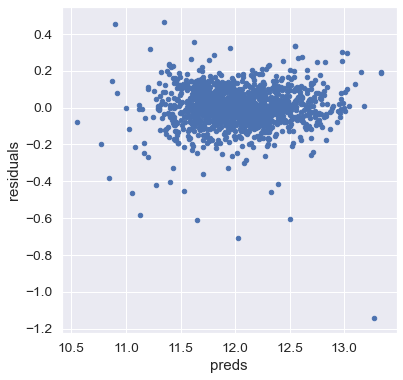

In [82]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":ridge.predict(X_train_l), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")

The residual plot looks pretty good, it seems that distribution is aleatory and near to zero.

**Random Forest Regression**

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation.

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
r_forest = RandomForestRegressor(n_estimators = 100, random_state = 0)
r_forest.fit(X_train_l, y)

RandomForestRegressor(random_state=0)

In [85]:
print('Random Forest Regression:')
print("RMSE =", rmse(y, r_forest.predict(X_train_l)))

Random Forest Regression:
RMSE = 0.05183786738621668


The Random Forest seems perform better than other models.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='preds', ylabel='residuals'>

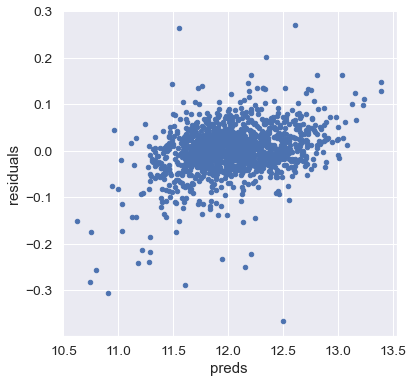

In [86]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":r_forest.predict(X_train_l), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")

# Explainable Machine Learning with SHAP

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions

In [87]:
X_train_l


,0,1,2,3,4,5,6,7,8,9,...,179,180,186,189,196,199,206,208,209,213
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,6.752270,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,7.140453,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,6.824374,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,6.867974,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,7.043160,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,6.859615,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1455,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,7.636752,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1456,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,7.080026,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1457,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,6.982863,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [88]:
col_n = pd.DataFrame(col_n)
col_n['index'] = range(1, len(col_n) + 1)
col_n = col_n[col_n.index.isin(col_lasso_nz)]

col_n

,0,index
0,MSSubClass,1
1,LotArea,2
2,OverallQual,3
3,OverallCond,4
4,YearBuilt,5
...,...,...
199,PavedDrive_Y,200
206,SaleType_New,207
208,SaleType_WD,209
209,SaleCondition_Abnorml,210


In [89]:
lis_n = col_n[0].tolist()
lis_n

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'BldgType_1Fam',
 'BldgType_Twnhs',
 'HouseStyle_2Story',
 'RoofStyle_Gable',
 'RoofMatl_ClyTile',
 'Exterior1st_BrkFace',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',


In [90]:
X_train_l.columns = lis_n
X_train_l

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_TA,Functional_Typ,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,6.752270,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,7.140453,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,6.824374,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,6.867974,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,7.043160,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,6.859615,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1455,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,7.636752,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1456,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,7.080026,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1457,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,6.982863,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [91]:
X_train_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1459 non-null   float64
 1   LotArea                1459 non-null   float64
 2   OverallQual            1459 non-null   float64
 3   OverallCond            1459 non-null   float64
 4   YearBuilt              1459 non-null   float64
 5   YearRemodAdd           1459 non-null   float64
 6   BsmtFinSF1             1459 non-null   float64
 7   BsmtFinSF2             1459 non-null   float64
 8   BsmtUnfSF              1459 non-null   float64
 9   1stFlrSF               1459 non-null   float64
 10  2ndFlrSF               1459 non-null   float64
 11  LowQualFinSF           1459 non-null   float64
 12  GrLivArea              1459 non-null   float64
 13  BsmtFullBath           1459 non-null   float64
 14  FullBath               1459 non-null   float64
 15  Half

In [92]:
RFC_model = r_forest.fit(X_train_l, y)

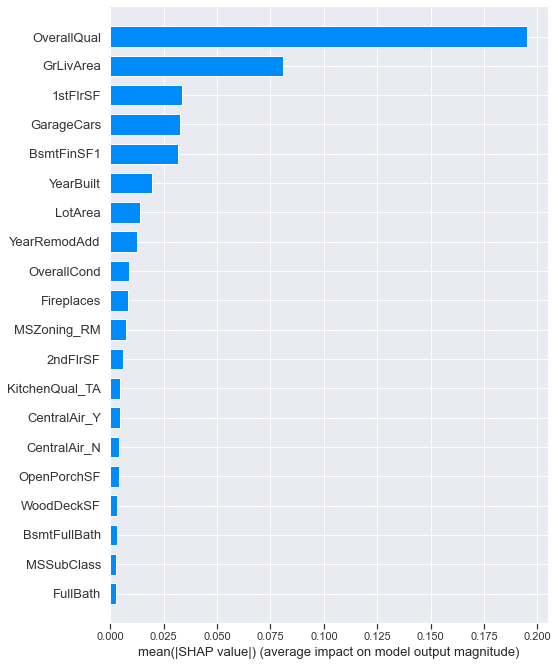

In [93]:
shap_values = shap.TreeExplainer(RFC_model).shap_values(X_train_l)
shap.summary_plot(shap_values, X_train_l, plot_type="bar")

As showed by the confusion matrix, *OverallQual*, *GrLivArea*, *GarageCars*, *1stFlrSF* are the most significative features. Also *YearBuilt* and *YearRemodAdd* are significative.
The features shows in the chart and in particular the mentioned above explain the price of sales. 